In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

adf = pd.read_csv('Processed.csv')
adf=adf[['Score','Period of stay','Traveler type','Pool','Gym','Tennis court','Spa','Casino','Free internet','Hotel stars','Nr. rooms']]
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Score           504 non-null    object 
 1   Period of stay  504 non-null    int64  
 2   Traveler type   504 non-null    int64  
 3   Pool            504 non-null    int64  
 4   Gym             504 non-null    int64  
 5   Tennis court    504 non-null    int64  
 6   Spa             504 non-null    int64  
 7   Casino          504 non-null    int64  
 8   Free internet   504 non-null    int64  
 9   Hotel stars     504 non-null    int64  
 10  Nr. rooms       503 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 43.4+ KB


Getting descriptive features

In [2]:
col_list = []
for (name, series) in adf.iteritems():
    if name != 'Score':
        col_list.append(name)
        
for (name, series) in adf.iteritems():
    print(adf[name].value_counts())
    print("\n")
    

High    391
Low     113
Name: Score, dtype: int64


0    128
2    126
1    126
3    124
Name: Period of stay, dtype: int64


0    214
1    110
2     82
3     74
4     24
Name: Traveler type, dtype: int64


1    480
0     24
Name: Pool, dtype: int64


1    480
0     24
Name: Gym, dtype: int64


0    384
1    120
Name: Tennis court, dtype: int64


1    384
0    120
Name: Spa, dtype: int64


1    456
0     48
Name: Casino, dtype: int64


1    480
0     24
Name: Free internet, dtype: int64


5    192
3    168
4    144
Name: Hotel stars, dtype: int64


0.137536    24
0.270904    24
1.000000    24
0.733264    24
0.333160    24
0.738995    24
0.702266    24
0.480854    24
0.141704    24
0.721803    24
0.654337    24
0.156030    24
0.284970    24
0.033082    24
0.710602    24
0.988018    24
0.933837    24
0.975514    24
0.166189    24
0.000000    24
0.823131    23
Name: Nr. rooms, dtype: int64




Performing Undersampling to get even distribution of scores

In [3]:
sampHigh = adf[adf['Score'] == "High"].sample(n=113)
sampLow = adf[adf['Score'] == "Low"].sample(n=113,replace=False)
adf = pd.concat([sampHigh,sampLow],axis=0)
adf = adf.sample(frac=1)
adf = adf.reset_index(drop=True)
adf["Score"].value_counts()

High    113
Low     113
Name: Score, dtype: int64

Splitting dataset into training and testing data (67% of samples become training data, 33% testing)

In [4]:
adf_desc = adf[col_list]
adf_cols = adf_desc.columns

X = adf_desc[col_list].values
Y = adf['Score'].values

from sklearn.model_selection import train_test_split
XN = adf[adf_cols]
y = adf['Score']
X_train, X_test, Y_train, Y_test = train_test_split(XN,y,test_size =0.33,random_state=0)

Performing classification and finding best K value

     KNN  Score for Training  Score for Testing
1    1.0            0.927152           0.520000
2    2.0            0.788079           0.520000
3    3.0            0.781457           0.506667
4    4.0            0.708609           0.533333
5    5.0            0.701987           0.546667
6    6.0            0.682119           0.480000
7    7.0            0.715232           0.506667
8    8.0            0.688742           0.533333
9    9.0            0.675497           0.533333
10  10.0            0.668874           0.520000
11  11.0            0.668874           0.546667
12  12.0            0.629139           0.480000
13  13.0            0.662252           0.506667
14  14.0            0.629139           0.453333
15  15.0            0.668874           0.480000
16  16.0            0.649007           0.440000
17  17.0            0.688742           0.480000
18  18.0            0.688742           0.466667
19  19.0            0.675497           0.426667


[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'k')]

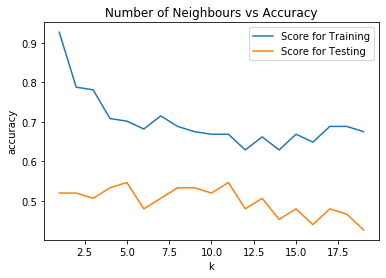

In [5]:
from sklearn.neighbors import KNeighborsClassifier
resultsKNN = pd.DataFrame(columns = ['KNN','Score for Training','Score for Testing'])
for knnCount in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = knnCount,p=2,metric='minkowski')
    knn.fit(X_train,Y_train)
    scoreTrain = knn.score(X_train,Y_train)
    scoreTest = knn.score(X_test,Y_test)
    resultsKNN.loc[knnCount] = [knnCount,scoreTrain,scoreTest]
    
print(resultsKNN.head(20))
resultsKNN.pop('KNN')
ax = resultsKNN.plot(title="Number of Neighbours vs Accuracy")
ax.set(xlabel='k',ylabel='accuracy')

              precision    recall  f1-score   support

        High       0.55      0.58      0.56        38
         Low       0.54      0.51      0.53        37

    accuracy                           0.55        75
   macro avg       0.55      0.55      0.55        75
weighted avg       0.55      0.55      0.55        75



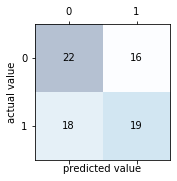

In [6]:
knn = KNeighborsClassifier(n_neighbors = 5,p=2,metric='minkowski')
knn.fit(X_train,Y_train)
scoreTrain = knn.score(X_train,Y_train)
scoreTest = knn.score(X_test,Y_test)
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

confmat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center',ha='center')
plt.xlabel('predicted value')
plt.ylabel('actual value')


print(classification_report(Y_test, y_pred))

Information-Based Model

In [7]:
adf_desc = adf[col_list]
adf_cols = adf_desc.columns

X = adf_desc[col_list].values
Y = adf['Score'].values

X_train, X_test, Y_train, Y_test = train_test_split(XN,y,test_size =0.33,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
dt = dt.fit(X_train,Y_train)
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


Using entropy

In [9]:
resultsEntropy = pd.DataFrame(columns = ['LevelLimit','Score for Training','Score for Testing'])
for treeDepth in range(1,11):
    dt_i = DecisionTreeClassifier(criterion="entropy", max_depth=treeDepth, random_state=0)
    dt_i = dt_i.fit(X_train,Y_train)
    dt_i.predict(X_test)
    scoreTrain = dt_i.score(X_train,Y_train)
    scoreTest = dt_i.score(X_test,Y_test)
    resultsEntropy.loc[treeDepth] = [treeDepth,scoreTrain,scoreTest]
    
print(resultsEntropy)

    LevelLimit  Score for Training  Score for Testing
1          1.0            0.622517           0.546667
2          2.0            0.635762           0.600000
3          3.0            0.682119           0.533333
4          4.0            0.721854           0.520000
5          5.0            0.754967           0.520000
6          6.0            0.827815           0.520000
7          7.0            0.860927           0.533333
8          8.0            0.894040           0.533333
9          9.0            0.907285           0.533333
10        10.0            0.927152           0.533333


              precision    recall  f1-score   support

        High       0.56      0.92      0.70        38
         Low       0.77      0.27      0.40        37

    accuracy                           0.60        75
   macro avg       0.67      0.60      0.55        75
weighted avg       0.67      0.60      0.55        75



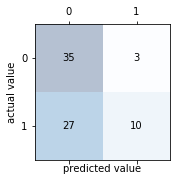

In [11]:
dt_i = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)
dt_i = dt_i.fit(X_train,Y_train)
y_pred = dt_i.predict(X_test)

from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center',ha='center')
plt.xlabel('predicted value')
plt.ylabel('actual value')


print(classification_report(Y_test, y_pred))

Using gini

In [12]:
resultsGini = pd.DataFrame(columns = ['LevelLimit','Score for Training','Score for Testing'])
for treeDepth in range(1,11):
    dt_i = DecisionTreeClassifier(criterion="gini", max_depth=treeDepth, random_state=0)
    dt_i = dt_i.fit(X_train,Y_train)
    y_pred = dt_i.predict(X_test)
    scoreTrain = dt_i.score(X_train,Y_train)
    scoreTest = dt_i.score(X_test,Y_test)
    resultsGini.loc[treeDepth] = [treeDepth,scoreTrain,scoreTest]

print(resultsGini)

    LevelLimit  Score for Training  Score for Testing
1          1.0            0.622517           0.546667
2          2.0            0.635762           0.600000
3          3.0            0.682119           0.533333
4          4.0            0.721854           0.520000
5          5.0            0.768212           0.520000
6          6.0            0.827815           0.533333
7          7.0            0.860927           0.520000
8          8.0            0.894040           0.546667
9          9.0            0.907285           0.520000
10        10.0            0.927152           0.546667


              precision    recall  f1-score   support

        High       0.56      0.92      0.70        38
         Low       0.77      0.27      0.40        37

    accuracy                           0.60        75
   macro avg       0.67      0.60      0.55        75
weighted avg       0.67      0.60      0.55        75



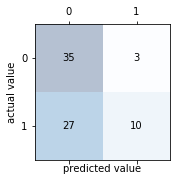

In [14]:
dt_i = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=0)
dt_i = dt_i.fit(X_train,Y_train)
y_pred = dt_i.predict(X_test)


confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center',ha='center')
plt.xlabel('predicted value')
plt.ylabel('actual value')


print(classification_report(Y_test, y_pred))

Visualization Entropy Accuracy

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Tree depth')]

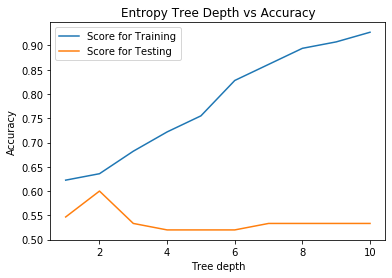

In [15]:
ax = resultsEntropy.plot.line(x='LevelLimit',y=['Score for Training','Score for Testing'],title="Entropy Tree Depth vs Accuracy")
ax.set(xlabel='Tree depth',ylabel='Accuracy')

Visualization Gini Accuracy

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Tree depth')]

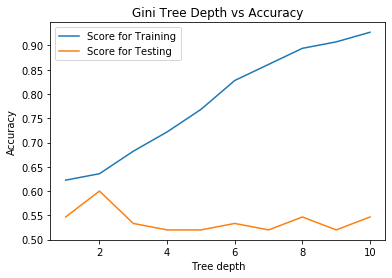

In [16]:
ax = resultsGini.plot.line(x='LevelLimit',y=['Score for Training','Score for Testing'],title="Gini Tree Depth vs Accuracy")
ax.set(xlabel='Tree depth',ylabel='Accuracy')

Naive Bayes

In [17]:
adf_desc = adf[col_list]
adf_cols = adf_desc.columns

X = adf_desc[col_list].values
Y = adf['Score'].values

X_train, X_test, Y_train, Y_test = train_test_split(XN,y,test_size =0.33,random_state=0)

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train,Y_train)
y_pred = gnb.predict(X_test)
gnb.score(X_test,Y_test)

0.56

              precision    recall  f1-score   support

        High       0.54      0.89      0.67        38
         Low       0.67      0.22      0.33        37

    accuracy                           0.56        75
   macro avg       0.60      0.56      0.50        75
weighted avg       0.60      0.56      0.50        75



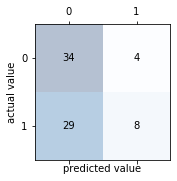

In [19]:
from sklearn.metrics import confusion_matrix

labels = [""]
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center',ha='center')
plt.xlabel('predicted value')
plt.ylabel('actual value')
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

Logistic Regression

In [20]:
adf_desc = adf[col_list]
adf_cols = adf_desc.columns

X = adf_desc[col_list].values
Y = adf['Score'].values

X_train, X_test, Y_train, Y_test = train_test_split(XN,y,test_size =0.33,random_state=0)

0.56
              precision    recall  f1-score   support

        High       0.56      0.63      0.59        38
         Low       0.56      0.49      0.52        37

    accuracy                           0.56        75
   macro avg       0.56      0.56      0.56        75
weighted avg       0.56      0.56      0.56        75



Text(0, 0.5, 'actual value')

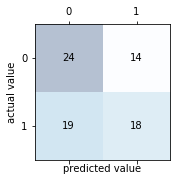

In [21]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
y_pred = logmodel.predict(X_test)
print(logmodel.score(X_test,Y_test))

from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center',ha='center')
plt.xlabel('predicted value')
plt.ylabel('actual value')